In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [8]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [5]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [6]:
# application['INCOME_BINS'] = pd.qcut(application['AMT_INCOME_TOTAL'],q=3,labels=['Low','Medium','High'])
# application['INCOME_BINS'].value_counts()

### Income vs Flag own realty

In [18]:
ranges = [25649,120000,200000,117000000]
application['INCOME_BINS'] = pd.cut(application['AMT_INCOME_TOTAL'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

application['INCOME_BINS'].value_counts()
# pd.DataFrame(pd.cut(application['AMT_INCOME_TOTAL'],bins=ranges,precision=0).value_counts()).sort_index().reset_index()

Medium    116259
Low       103337
High       87915
Name: INCOME_BINS, dtype: int64

In [19]:
a = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY']).count()[['SK_ID_CURR']]
a_default = (a/a_level1)*100
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('COUNT', 0),('Defaulter_rates', 0)],axis=1).stack()
a['COUNT'] = a_level1['SK_ID_CURR']
income_rates = a.reset_index()

COUNT  Defaulter_rates
INCOME_BINS FLAG_OWN_REALTY TARGET                        
Low         N               1       32057            9.009
            Y               1       71280            8.134
Medium      N               1       35733            8.757
            Y               1       80526            8.365
High        N               1       26409            6.911
            Y               1       61506            7.233

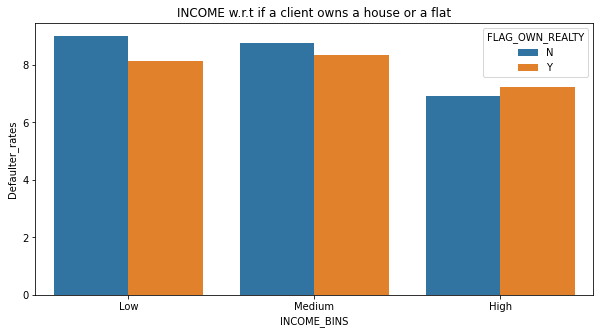

In [26]:
display(a)
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='Defaulter_rates',hue='FLAG_OWN_REALTY',data=income_rates)
plt.title("INCOME w.r.t if a client owns a house or a flat")
plt.show()

| index 	|         Income Bins 	| Count  	|
|------:	|--------------------:	|--------	|
|     0 	|     (25649, 120000] 	| 103337 	|
|     1 	|    (120000, 200000] 	| 116259 	|
|     2 	| (200000, 117000000] 	|  87915 	|

In [25]:
a = application.groupby(['INCOME_BINS','FLAG_OWN_CAR','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['INCOME_BINS','FLAG_OWN_CAR']).count()[['SK_ID_CURR']]
a_default = (a/a_level1)*100
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('COUNT', 0),('Defaulter_rates', 0)],axis=1).stack()
a['COUNT'] = a_level1['SK_ID_CURR']
income_car = a.reset_index()

COUNT  Defaulter_rates
INCOME_BINS FLAG_OWN_CAR TARGET                        
Low         N            1       80249            8.651
            Y            1       22907            7.548
Medium      N            1       73904            8.817
            Y            1       38524            7.964
High        N            1       48771            7.773
            Y            1       43156            6.439

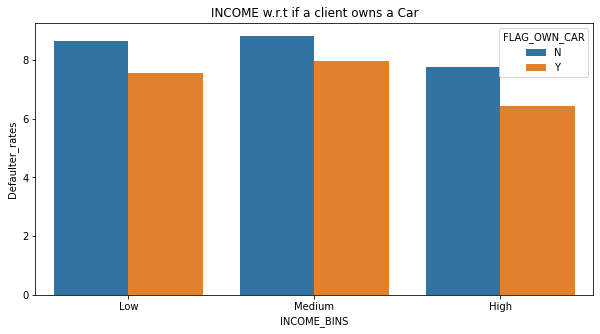

In [26]:
display(a)
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='Defaulter_rates',hue='FLAG_OWN_CAR',data=income_car)
plt.title("INCOME w.r.t if a client owns a Car")
plt.show()

### Income wrt to if a client owns a house and a car

<!-- a = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY','FLAG_OWN_CAR','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['INCOME_BINS','FLAG_OWN_REALTY','FLAG_OWN_CAR']).count()[['SK_ID_CURR']]
a_default = (a/a_level1)*100
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('COUNT', 0),('Defaulter_rates', 0)],axis=1).stack()
a['COUNT'] = a_level1['SK_ID_CURR']
# income_car = a.reset_index() -->

<!-- # display(a)
# plt.figure(figsize=(10,5))
# sns.barplot(x='INCOME_BINS',y='Defaulter_rates',hue='FLAG_OWN_CAR',data=income_car)
a.drop(['COUNT'],axis=1).unstack().unstack().plot(kind='bar',figsize=(15,6))
plt.title("INCOME w.r.t if a client owns a house and a Car")
plt.legend(loc=1,prop={'size':12},labels=['Dont own a car','Own a car'])
plt.show() -->

In [146]:
# 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'
display(application['NAME_EDUCATION_TYPE'].value_counts())
display(application['NAME_INCOME_TYPE'].value_counts())

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [33]:
a = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Count'] = a_level1['SK_ID_CURR']
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a.drop(['SK_ID_CURR'],axis=1,inplace=True)
# a = a.rename(columns={'SK_ID_CURR':'COUNTwrtTarget'})
a = a.unstack().drop([('Defaulter_rates', 0),('Count', 0)],axis=1).fillna(0).stack()
a = a.reset_index(level=-1).drop('TARGET',axis=1)
education_type = a.reset_index()
education_type = education_type.drop(23).reset_index(drop=True)

Count  \
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                   
Academic degree               Commercial associate      43.000   
                              Pensioner                  0.000   
                              State servant              0.000   
                              Working                   72.000   
Higher education              Businessman                0.000   
                              Commercial associate  24,025.000   
                              Maternity leave            0.000   
                              Pensioner              8,188.000   
                              State servant          8,863.000   
                              Student                    0.000   
                              Unemployed                 0.000   
                              Working               33,762.000   
Incomplete higher             Commercial associate   3,400.000   
                              Pensioner                518.000   
                              State servant            770.000   
                              Student                    0.000   
                              Unemployed                 3.000   
                              Working                5,585.000   
Lower secondary               Commercial associate     460.000   
                              Pensioner              1,529.000   
                              State servant            102.000   
                              Working                1,725.000   
Secondary / secondary special Commercial associate  43,689.000   
                              Maternity leave            2.000   
                              Pensioner             45,101.000   
                              State servant         11,945.000   
                              Student                    0.000   
                              Unemployed                13.000   
                              Working              117,630.000   

                                                    Defaulter_rates  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                       
Academic degree               Commercial associate            2.326  
                              Pensioner                       0.000  
                              State servant                   0.000  
                              Working                         2.778  
Higher education              Businessman                     0.000  
                              Commercial associate            5.174  
                              Maternity leave                 0.000  
                              Pensioner                       4.152  
                              State servant                   3.881  
                              Student                         0.000  
                              Unemployed                      0.000  
                              Working                         6.167  
Incomplete higher             Commercial associate            8.206  
                              Pensioner                       4.440  
                              State servant                   6.753  
                              Student                         0.000  
                              Unemployed                     33.333  
                              Working                         9.257  
Lower secondary               Commercial associate           12.174  
                              Pensioner                       6.671  
                              State servant                   7.843  
                              Working                        14.551  
Secondary / secondary special Commercial associate            8.654  
                              Maternity leave               100.000  
                              Pensioner                       5.581  
                              State servant                   7.074  
                              Student             

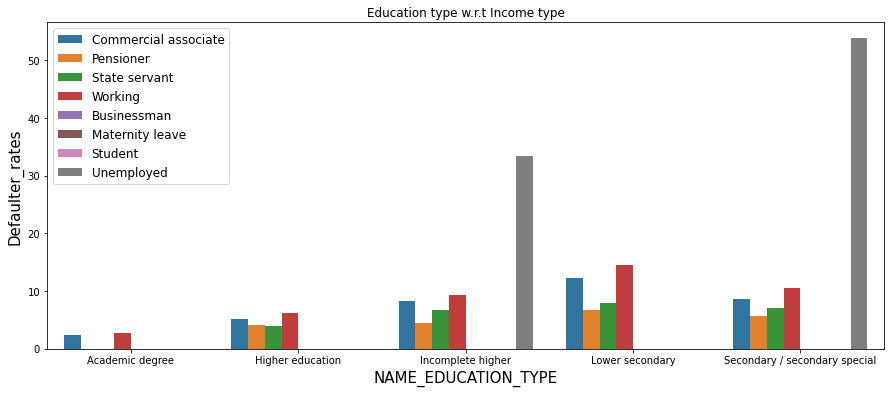

In [34]:
display(a)
plt.figure(figsize=(15,6))
sns.barplot(x='NAME_EDUCATION_TYPE',y='Defaulter_rates',hue='NAME_INCOME_TYPE',data=education_type)
plt.title("Education type w.r.t Income type")
plt.xlabel('NAME_EDUCATION_TYPE',size=15)
plt.ylabel('Defaulter_rates',size=15)
plt.legend(loc=2,prop={'size':12})
plt.show()

#### Heatmap representation of the same

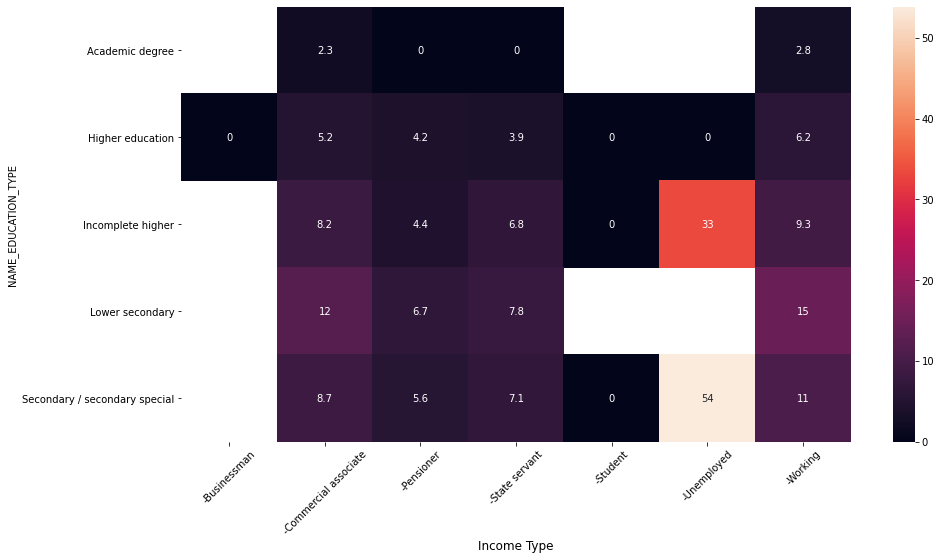

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(a.drop('Count',axis=1).rename(columns={'Defaulter_rates':''}).unstack().drop([('','Maternity leave')],axis=1)
            ,annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=12)
plt.show()

plt.figure(figsize=(100,100))
sns.heatmap(application.corr(),annot=True)

In [106]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.000      215417
1.000       33862
2.000       14412
3.000        1717
4.000         476
5.000          64
6.000          28
7.000           7
8.000           7
19.000          1
261.000         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [144]:
a = application.groupby(['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET               
0.000                      0.000                      1       19,741.000   
                           1.000                      1          118.000   
                           2.000                      1            6.000   
1.000                      0.000                      1          631.000   
                           1.000                      1            7.000   
2.000                      0.000                      1           20.000   
3.000                      0.000                      1            4.000   
4.000                      0.000                      1            4.000   
5.000                      0.000                      1            1.000   
6.000                      0.000                      1            1.000   

                                                              Defaulter_rates  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET                    
0.000                      0.000                      1                 7.714   
                           1.000                      1                 7.930   
                           2.000                      1                11.321   
1.000                      0.000                      1                 7.757   
                           1.000                      1                10.000   
2.000                      0.000                      1                10.152   
3.000                      0.000                      1                 6.897   
4.000                      0.000                      1                11.765   
5.000                      0.000                      1                10.000   
6.000                      0.000                      1                 5.000   

                                                               Count  
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET          
0.000                      0.000                      1       255905  
                           1.000                      1         1488  
                           2.000                      1           53  
1.000                      0.000                      1         8135  
                           1.000                      1           70  
2.000                      0.000                      1          197  
3.000                      0.000                      1           58  
4.000                      0.000                      1           34  
5.000                      0.000                      1           10  
6.000                      0.000                      1           20

SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET               
0.000                      0.000                      1       19,741.000   
                           1.000                      1          118.000   
                           2.000                      1            6.000   
1.000                      0.000                      1          631.000   
                           1.000                      1            7.000   
2.000                      0.000                      1           20.000   
3.000                      0.000                      1            4.000   
4.000                      0.000                      1            4.000   
5.000                      0.000                      1            1.000   

                                                              Defaulter_rates  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET                    
0.000                      0.000                      1                 7.714   
                           1.000                      1                 7.930   
                           2.000                      1                11.321   
1.000                      0.000                      1                 7.757   
                           1.000                      1                10.000   
2.000                      0.000                      1                10.152   
3.000                      0.000                      1                 6.897   
4.000                      0.000                      1                11.765   
5.000                      0.000                      1                10.000   

                                                               Count  
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET          
0.000                      0.000                      1       255905  
                           1.000                      1         1488  
                           2.000                      1           53  
1.000                      0.000                      1         8135  
                           1.000                      1           70  
2.000                      0.000                      1          197  
3.000                      0.000                      1           58  
4.000                      0.000                      1           34  
5.000                      0.000                      1           10

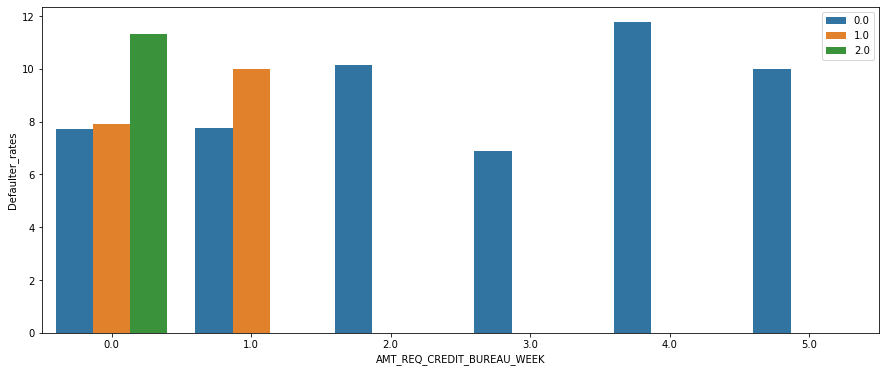

In [162]:
display(a.drop(6))
plt.figure(figsize=(15,6))
sns.barplot(x='AMT_REQ_CREDIT_BUREAU_WEEK',y='Defaulter_rates',hue='AMT_REQ_CREDIT_BUREAU_HOUR',data=a.reset_index().drop([9]))
plt.title("")
plt.legend(loc=1)
plt.show()

In [216]:
a = application.groupby(['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']).count()[['SK_ID_CURR']]
a['Defaulter_rates'] = a/a_level1*100
# a.rename(columns={'SK_ID_CURR':'COUNT'})
a = a.unstack().drop([('SK_ID_CURR', 0),('Defaulter_rates',0)],axis=1).stack()
a['Count'] = a_level1
a

SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR TARGET               
0.000                      0.000                     0.000                      1       19,649.000   
                                                     1.000                      1           90.000   
                                                     2.000                      1            2.000   
                           1.000                     0.000                      1           87.000   
                                                     1.000                      1           28.000   
                           2.000                     0.000                      1            5.000   
                                                     2.000                      1            4.000   
1.000                      0.000                     0.000                      1          624.000   
                                                     1.000                      1            4.000   
                           1.000                     0.000                      1            7.000   
                                                     1.000                      1            3.000   
2.000                      0.000                     0.000                      1           18.000   
                           2.000                     0.000                      1            2.000   
3.000                      0.000                     0.000                      1            2.000   
                           3.000                     0.000                      1            2.000   
4.000                      0.000                     0.000                      1            2.000   
                           4.000                     0.000                      1            2.000   
5.000                      4.000                     0.000                      1            1.000   
6.000                      0.000                     0.000                      1            1.000   

                                                                                        Defaulter_rates  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR TARGET                    
0.000                      0.000                     0.000                      1                 7.706   
                                                     1.000                      1                 7.595   
                                                     2.000                      1                14.286   
                           1.000                     0.000                      1                10.081   
                                                     1.000                      1                 9.428   
                           2.000                     0.000                      1                11.905   
                                                     2.000                      1                11.429   
1.000                      0.000                     0.000                      1                 7.774   
                                                     1.000                      1                 6.780   
                           1.000                     0.000                      1                 6.604   
                                                     1.000                      1                27.273   
2.000                      0.000                     0.000                      1                10.778   
                           2.000                     0.000                      1                11.111   
3.000                      0.000                     0.000                      1                10.526   
                           3.000                     0.000                      1                 6.452   
4.000                      0.000                     0.000                      1                14.286   
                   

Defaulter_rates
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR TARGET                 
0.000                      0.000                     0.000                      1                 7.706
                                                     1.000                      1                 7.595
                                                     2.000                      1                14.286
                           1.000                     0.000                      1                10.081
                                                     1.000                      1                 9.428
                           2.000                     0.000                      1                11.905
                                                     2.000                      1                11.429
1.000                      0.000                     0.000                      1                 7.774
                                                     1.000                      1                 6.780
                           1.000                     0.000                      1                 6.604
                                                     1.000                      1                27.273
2.000                      0.000                     0.000                      1                10.778
                           2.000                     0.000                      1                11.111
4.000                      0.000                     0.000                      1                14.286
                           4.000                     0.000                      1                11.765
5.000                      4.000                     0.000                      1                33.333

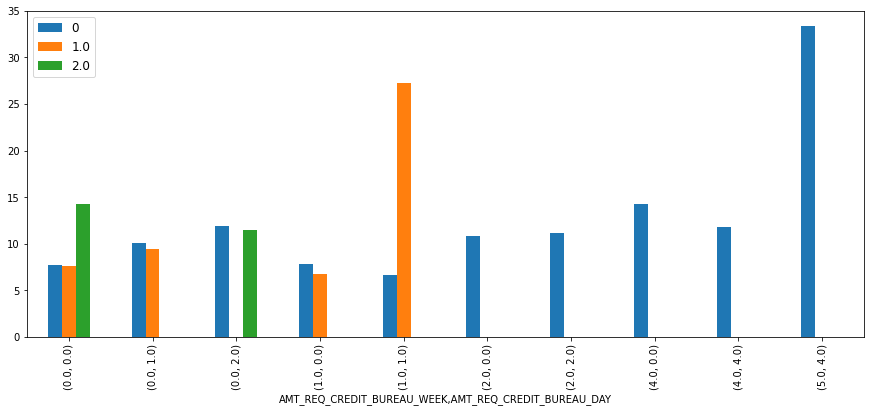

In [245]:
credit_bureau = a.drop([3,6]).drop(['Count','SK_ID_CURR'],axis=1)
display(credit_bureau)
credit_bureau.unstack().unstack().plot(kind='bar',figsize=(15,6))
plt.legend(loc=2,prop={'size':12},labels=['0','1.0','2.0'])

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,TARGET'>

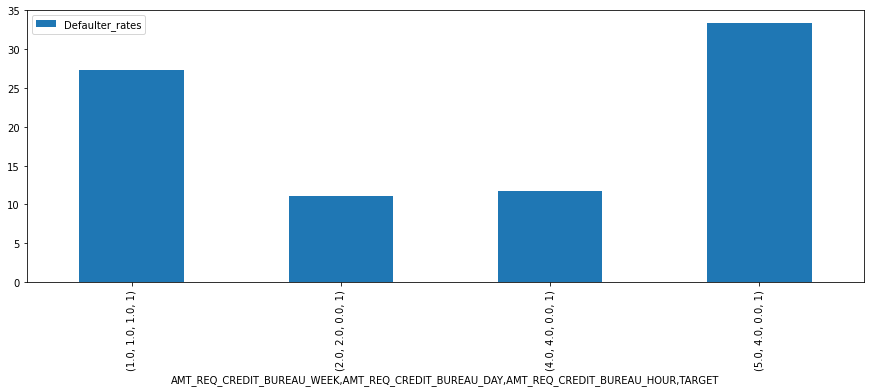

In [207]:
a.drop([0,3,6]).drop(['Count','SK_ID_CURR'],axis=1).unstack().unstack().unstack().drop([('Defaulter_rates', 1, 0.0, 0.0),
     ('Defaulter_rates', 1, 0.0, 1.0),('Defaulter_rates', 1, 1.0, 0.0)],axis=1).stack().stack().plot(kind='bar',figsize=(15,5))

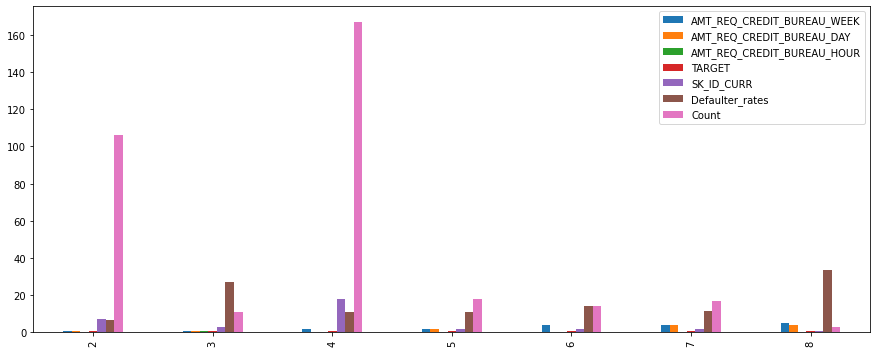

In [182]:
# display(a.drop(6))
# plt.figure(figsize=(15,6))
# sns.barplot(x='AMT_REQ_CREDIT_BUREAU_WEEK',y='Defaulter_rates',hue='AMT_REQ_CREDIT_BUREAU_HOUR',data=a.drop([0,3,6]).reset_index().drop([0,1]))
a.drop([0,3,6]).unstack().drop([0,1]).plot(kind='bar',figsize=(15,6))
plt.title("")
plt.legend(loc=1)
plt.show()

COUNT  Defaulter_rates
INCOME_BINS FLAG_OWN_REALTY TARGET                        
Low         N               1       31989            9.006
            Y               1       71167            8.136
Medium      N               1       34552            8.810
            Y               1       77876            8.398
High        N               1       27658            6.931
            Y               1       64269            7.240

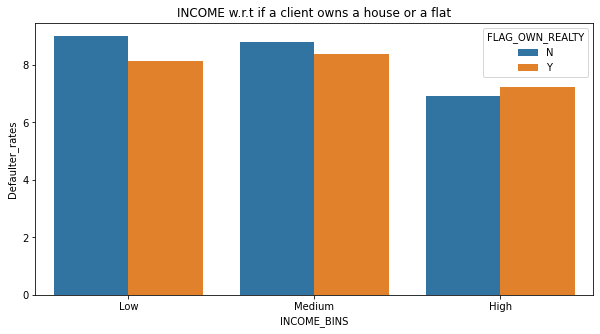

In [24]:
display(a)
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='Defaulter_rates',hue='FLAG_OWN_REALTY',data=income_rates)
plt.title("INCOME w.r.t if a client owns a house or a flat")
plt.show()

| index 	|        AMT_INCOME_TOTAL 	| Count  	|
|------:	|------------------------:	|--------	|
|     0 	|   (25649.999, 117000.0] 	| 103156 	|
|     1 	|    (117000.0, 180000.0] 	| 112428 	|
|     2 	| (180000.0, 117000000.0] 	|  91927 	|

COUNT  Defaulter_rates
INCOME_BINS FLAG_OWN_CAR TARGET                        
Low         N            1       80249            8.651
            Y            1       22907            7.548
Medium      N            1       73904            8.817
            Y            1       38524            7.964
High        N            1       48771            7.773
            Y            1       43156            6.439

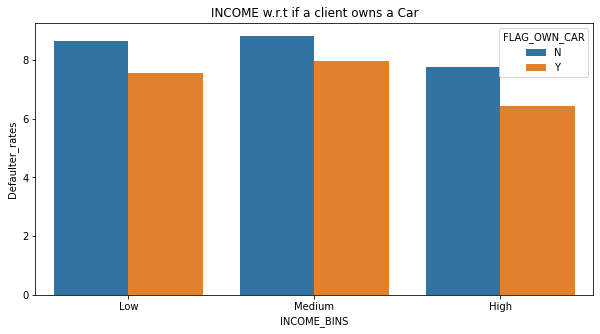

In [26]:
display(a)
plt.figure(figsize=(10,5))
sns.barplot(x='INCOME_BINS',y='Defaulter_rates',hue='FLAG_OWN_CAR',data=income_car)
plt.title("INCOME w.r.t if a client owns a Car")
plt.show()

Count  \
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE     TARGET               
Academic degree               Commercial associate 1           43.000   
                              Pensioner            1            0.000   
                              State servant        1            0.000   
                              Working              1           72.000   
Higher education              Businessman          1            0.000   
                              Commercial associate 1       24,025.000   
                              Maternity leave      1            0.000   
                              Pensioner            1        8,188.000   
                              State servant        1        8,863.000   
                              Student              1            0.000   
                              Unemployed           1            0.000   
                              Working              1       33,762.000   
Incomplete higher             Commercial associate 1        3,400.000   
                              Pensioner            1          518.000   
                              State servant        1          770.000   
                              Student              1            0.000   
                              Unemployed           1            3.000   
                              Working              1        5,585.000   
Lower secondary               Commercial associate 1          460.000   
                              Pensioner            1        1,529.000   
                              State servant        1          102.000   
                              Working              1        1,725.000   
Secondary / secondary special Commercial associate 1       43,689.000   
                              Maternity leave      1            2.000   
                              Pensioner            1       45,101.000   
                              State servant        1       11,945.000   
                              Student              1            0.000   
                              Unemployed           1           13.000   
                              Working              1      117,630.000   

                                                           Defaulter_rates  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE     TARGET                   
Academic degree               Commercial associate 1                 2.326  
                              Pensioner            1                 0.000  
                              State servant        1                 0.000  
                              Working              1                 2.778  
Higher education              Businessman          1                 0.000  
                              Commercial associate 1                 5.174  
                              Maternity leave      1                 0.000  
                              Pensioner            1                 4.152  
                              State servant        1                 3.881  
                              Student              1                 0.000  
                              Unemployed           1                 0.000  
                              Working              1                 6.167  
Incomplete higher             Commercial associate 1                 8.206  
                              Pensioner            1                 4.440  
                              State servant        1                 6.753  
                              Student              1                 0.000  
                              Unemployed           1                33.333  
                              Working              1                 9.257  
Lower secondary               Commercial associate 1                12.174  
                              Pensioner            1                 6.671  
                              State servant        1                 7.843  
                             

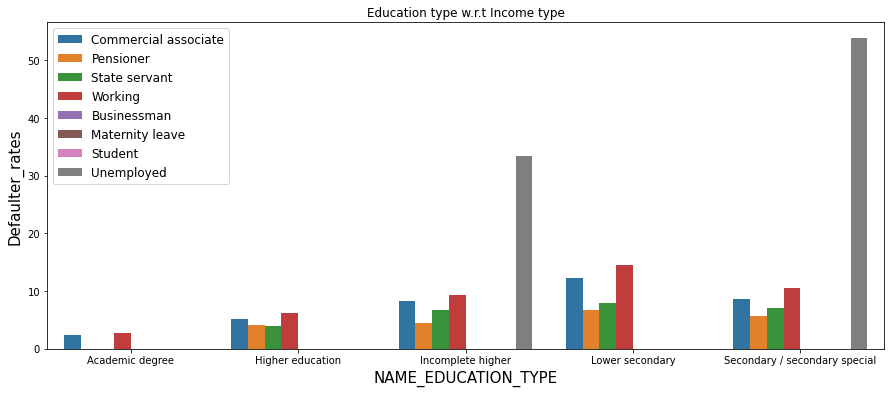

In [41]:
display(a)
plt.figure(figsize=(15,6))
sns.barplot(x='NAME_EDUCATION_TYPE',y='Defaulter_rates',hue='NAME_INCOME_TYPE',data=education_type)
plt.title("Education type w.r.t Income type")
plt.xlabel('NAME_EDUCATION_TYPE',size=15)
plt.ylabel('Defaulter_rates',size=15)
plt.legend(loc=2,prop={'size':12})
plt.show()

In [42]:
# display(a)

SK_ID_CURR  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET               
0.000                      0.000                      1       19,741.000   
                           1.000                      1          118.000   
                           2.000                      1            6.000   
1.000                      0.000                      1          631.000   
                           1.000                      1            7.000   
2.000                      0.000                      1           20.000   
3.000                      0.000                      1            4.000   
4.000                      0.000                      1            4.000   
5.000                      0.000                      1            1.000   

                                                              Defaulter_rates  \
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET                    
0.000                      0.000                      1                 7.714   
                           1.000                      1                 7.930   
                           2.000                      1                11.321   
1.000                      0.000                      1                 7.757   
                           1.000                      1                10.000   
2.000                      0.000                      1                10.152   
3.000                      0.000                      1                 6.897   
4.000                      0.000                      1                11.765   
5.000                      0.000                      1                10.000   

                                                               Count  
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_HOUR TARGET          
0.000                      0.000                      1       255905  
                           1.000                      1         1488  
                           2.000                      1           53  
1.000                      0.000                      1         8135  
                           1.000                      1           70  
2.000                      0.000                      1          197  
3.000                      0.000                      1           58  
4.000                      0.000                      1           34  
5.000                      0.000                      1           10

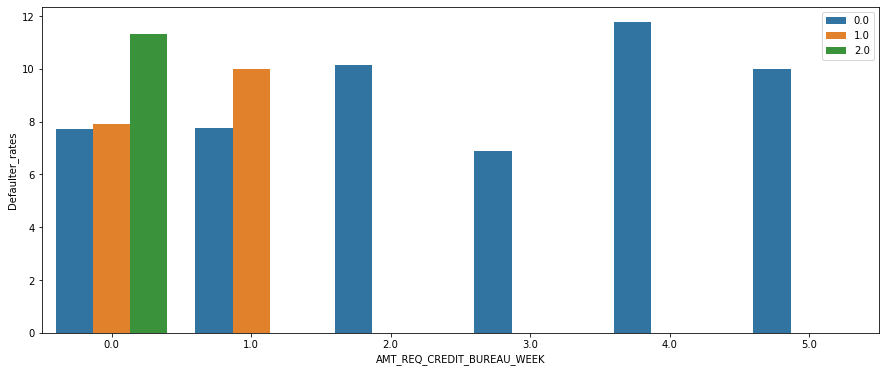

In [162]:
display(a.drop(6))
plt.figure(figsize=(15,6))
sns.barplot(x='AMT_REQ_CREDIT_BUREAU_WEEK',y='Defaulter_rates',hue='AMT_REQ_CREDIT_BUREAU_HOUR',data=a.reset_index().drop([9]))
plt.title("")
plt.legend(loc=1)
plt.show()

Defaulter_rates
AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_HOUR TARGET                 
0.000                      0.000                     0.000                      1                 7.706
                                                     1.000                      1                 7.595
                                                     2.000                      1                14.286
                           1.000                     0.000                      1                10.081
                                                     1.000                      1                 9.428
                           2.000                     0.000                      1                11.905
                                                     2.000                      1                11.429
1.000                      0.000                     0.000                      1                 7.774
                                                     1.000                      1                 6.780
                           1.000                     0.000                      1                 6.604
                                                     1.000                      1                27.273
2.000                      0.000                     0.000                      1                10.778
                           2.000                     0.000                      1                11.111
4.000                      0.000                     0.000                      1                14.286
                           4.000                     0.000                      1                11.765
5.000                      4.000                     0.000                      1                33.333

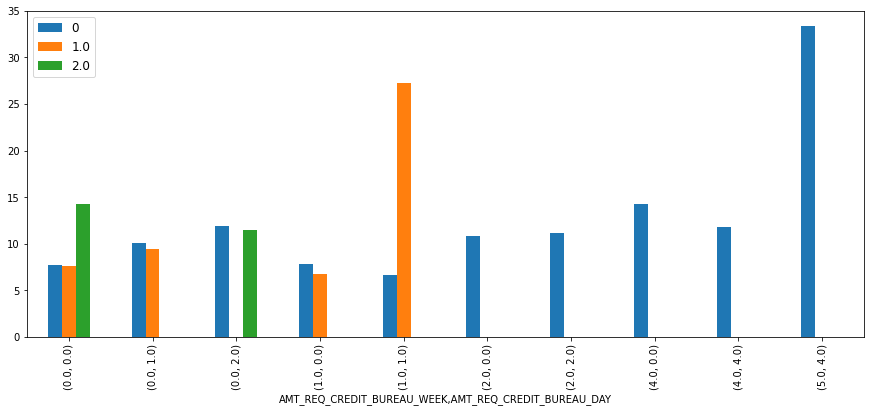

In [245]:
credit_bureau = a.drop([3,6]).drop(['Count','SK_ID_CURR'],axis=1)
display(credit_bureau)
credit_bureau.unstack().unstack().plot(kind='bar',figsize=(15,6))
plt.legend(loc=2,prop={'size':12},labels=['0','1.0','2.0'])